In [ ]:
#Ejemplo adaptado de
#Chapra y Canalé (2006). Métodos Numéricos para ingenieros. 5a Edición. Mc Graw Hill.
#La población (p) de una comunidad pequeña en los suburbios de una ciudad crece con rapidez durante un periodo de 20 años en la siguiente forma:

# t-tiempo                          0    3     5     8     10   15     20
# p- población                     100  150   200   550   650   950   2000
# control - variable de control     0    0     1     0     1     0     0

#Politicas para planificación control familiar, sería la variable control

# La serie de control indica los años en que se implementaron campañas de planificación familiar
# considerando que se requiere frenar la tasa de natalidad y evitar una explosión demográfica.

#Pronosticar la población en 5 años y analice el patrón de inserción de campañas de planificación familiar

#Ejemplo lineal

# Librerias a utilizar

#Datos y dataframes
import pandas as pd

#Algoritmos de regresion
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics

#Graficación y manejo de matrices
import matplotlib.pyplot as plt
import numpy as np

Código realizado por:
Dr. Luis Fabián Fuentes Cortés.
TecNM - Instituto Tecnológico de Celaya.
Departamento de Ingeniería Química.

##Regresión lineal


In [ ]:
#Ingresar datos y generar data frame
df=pd.read_csv("https://docs.google.com/spreadsheets/d/1AA9-XpXbOeKf2HS6SRgZIhwufJqXxGktVxqL39mfa6E/export?format=csv")
df

,Tiempo,Poblacion,Control
0,0,100,0
1,3,150,1
2,5,200,0
3,8,550,1
4,10,650,1
5,15,950,0
6,20,2000,1


<Axes: xlabel='Tiempo', ylabel='Poblacion'>

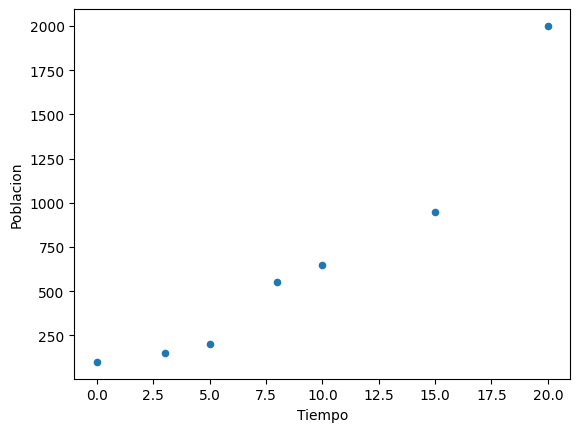

In [ ]:
df.plot.scatter(x='Tiempo',y='Poblacion')

In [ ]:
#Entrenamiento y predicción
regl=LinearRegression()
regl.fit(df[['Tiempo']],df['Poblacion'])

LinearRegression()

In [ ]:
#Predicción para la población en 5 años (año 25)
regl.predict([[25]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([2138.82352941])

In [ ]:
df["modelolin"]=pd.Series(regl.predict(df[['Tiempo']]))
df

,Tiempo,Poblacion,Control,modelolin
0,0,100,0,-135.686275
1,3,150,1,137.254902
2,5,200,0,319.215686
3,8,550,1,592.156863
4,10,650,1,774.117647
5,15,950,0,1229.019608
6,20,2000,1,1683.921569


In [ ]:
#Ecuación de la recta generada y=mx+b
print("p =",regl.coef_,"*t",regl.intercept_)

p = [90.98039216] *t -135.68627450980364


In [ ]:
#Predicción sobre el modelo
regl.coef_*df['Tiempo']+regl.intercept_

0    -135.686275
1     137.254902
2     319.215686
3     592.156863
4     774.117647
5    1229.019608
6    1683.921569
Name: Tiempo, dtype: float64

<Axes: xlabel='Tiempo', ylabel='Poblacion'>

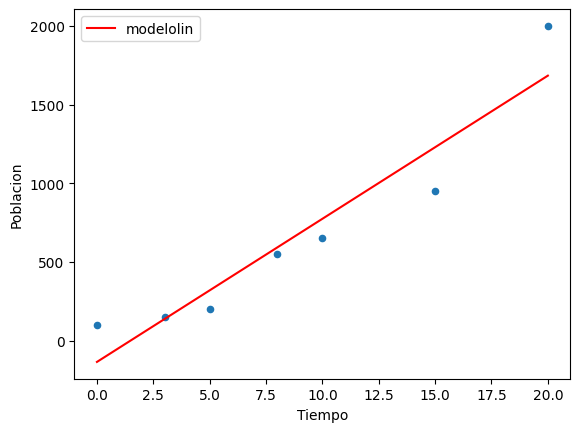

In [ ]:
#Graficación
ax=df.plot.scatter(x='Tiempo',y='Poblacion')
df.plot.line(x='Tiempo',y='modelolin',ax=ax, color="red")

##Regresión polinomial

In [ ]:
#Regresión Polinomial
polyreg=PolynomialFeatures(degree=2) #Grado del polinomio
#Definición de variables
x_poli=polyreg.fit_transform(df[['Tiempo']])
x_poli

array([[  1.,   0.,   0.],
       [  1.,   3.,   9.],
       [  1.,   5.,  25.],
       [  1.,   8.,  64.],
       [  1.,  10., 100.],
       [  1.,  15., 225.],
       [  1.,  20., 400.]])

In [ ]:
#Solución del modelo
regcuad=LinearRegression()
regcuad.fit(x_poli,df['Poblacion'])

LinearRegression()

In [ ]:
#Predicción a 5 años (Año 25)
regcuad.predict(polyreg.fit_transform([[25]]))

array([2916.49864045])

In [ ]:
#Evaluación del resto de valores
df["modelocuad"]=pd.Series(regcuad.predict(x_poli))
df

,Tiempo,Poblacion,Control,modelolin,modelocuad
0,0,100,0,-135.686275,114.940389
1,3,150,1,137.254902,165.279230
2,5,200,0,319.215686,242.148783
3,8,550,1,592.156863,422.418601
4,10,650,1,774.117647,585.908806
5,15,950,0,1229.019608,1146.220456
6,20,2000,1,1683.921569,1923.083734


In [ ]:
#Modelo generado
regcuad.coef_[0]+(regcuad.coef_[1]*df['Tiempo'])+(regcuad.coef_[2]*df['Tiempo']**2)+regcuad.intercept_

0     114.940389
1     165.279230
2     242.148783
3     422.418601
4     585.908806
5    1146.220456
6    1923.083734
Name: Tiempo, dtype: float64

In [ ]:
print("p = ",regcuad.coef_[2],"* t^2 + ",regcuad.coef_[1],"*t + ",regcuad.coef_[0]+regcuad.intercept_)

p =  4.331032559436657 * t^2 +  3.7865160705570986 *t +  114.94038903994965


<Axes: xlabel='Tiempo', ylabel='Poblacion'>

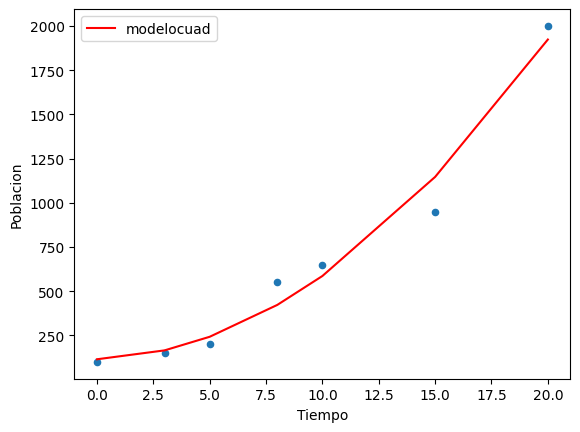

In [ ]:
#Graficación
ax=df.plot.scatter(x='Tiempo',y='Poblacion')
df.plot.line(x='Tiempo',y='modelocuad',ax=ax, color="red")

In [ ]:
print("correlación para modelo lineal ",metrics.r2_score(df['Poblacion'],df['modelolin']))
print("correlación para modelo polinomial ",metrics.r2_score(df['Poblacion'],df['modelocuad']))

correlación para modelo lineal  0.9010651432397931
correlación para modelo polinomial  0.9749596986946805


##Regresión logística


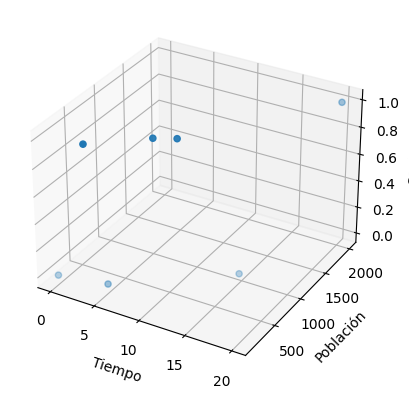

In [ ]:
#Ahora vamos a usar la varible de control, que es una variable categórica
#Regresion Logística: Selección de datos
xlogis=df.iloc[:,[0,1]].values
ylogis=df.iloc[:,2].values

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(xlogis[:,0],xlogis[:,1],ylogis)
ax.set_xlabel('Tiempo')
ax.set_ylabel('Población')
ax.set_zlabel('Control')
plt.show()

In [ ]:
#Escalamiento de valores de variables "continuas", convertir los datos a una estadística normalizada o normalización
xstan=StandardScaler()
xtr=xstan.fit_transform(xlogis)
xtr

array([[-1.3505627 , -0.90090669],
       [-0.88561489, -0.82005609],
       [-0.57564968, -0.73920549],
       [-0.11070186, -0.17325129],
       [ 0.19926335, -0.01155009],
       [ 0.97417637,  0.47355352],
       [ 1.7490894 ,  2.17141613]])

In [ ]:
#Generación del modelo
rlog=LogisticRegression()
rlog.fit(xtr,ylogis)
df["modelog"]=pd.Series(rlog.predict(xtr))
df


,Tiempo,Poblacion,Control,modelolin,modelocuad,modelog
0,0,100,0,-135.686275,114.940389,0
1,3,150,1,137.254902,165.279230,0
2,5,200,0,319.215686,242.148783,0
3,8,550,1,592.156863,422.418601,1
4,10,650,1,774.117647,585.908806,1
5,15,950,0,1229.019608,1146.220456,1
6,20,2000,1,1683.921569,1923.083734,1


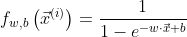

In [ ]:
#Parámetros del modelo
print(f"b: {rlog.intercept_}")
print(f"w: {rlog.coef_}")

b: [0.31586677]
w: [[0.15562046 0.36802822]]
